K-Nearest Neighbor Classifier Approach:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Import the stratified suffle split dataset for train data

In [2]:
train_file = "../Dataset/train_stratified.csv"
train_df = pd.read_csv(train_file, header = 0)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297960 entries, 0 to 297959
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 1.7 GB


In [4]:
#check for missing values
def missing_val(data):
  nullVal = data.isnull().sum().sum()
  return nullVal
missing_val(train_df)

0

Assign X and y for samples and classes 

In [5]:
X = train_df.iloc[:,1:].values
y = train_df.iloc[:,0].values

Hyperparameter tuning using GridSearchCV to validate the training data and find the best parameters for model. 

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#create model for tuning hyperparams
knn_grid = KNeighborsClassifier()

#range of k val to test
param_grid = {'n_neighbors': np.arange(3,8)}

#gridsearch to test all vals
knn_gridcv = GridSearchCV(knn_grid, param_grid, cv=5)

#model fitting
knn_gridcv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([3, 4, 5, 6, 7])})

In [13]:
#check best param to use for k val
best_kval = knn_gridcv.best_params_
print("Best k value for our model with tuning is : {}".format(best_kval) )

Best k value for our model with tuning is : {'n_neighbors': 5}


In [15]:
#check the score using best param
accuracy_score = knn_gridcv.best_score_ *100
print("Accuracy for our training dataset after tuning is : {:.2f}%".format(accuracy_score) )

Accuracy for our training dataset after tuning is : 95.57%


From the results of GridSearchCV, it is clear that the best accuracy score we can achieve using the best hyperparameter for n_neighbors=5, is approximately 96%. 

Now, check accuracy of our test data:

In [25]:
test_file = "../Dataset/test_stratified.csv"
test_df = pd.read_csv(test_file, header = 0)

In [26]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74490 entries, 0 to 74489
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 446.1 MB


In [27]:
x_test = test_df.iloc[:,1:].values
y_test = test_df.iloc[:,0].values

In [28]:
#apply best model with best n_neighbor on test data:
best_model = KNeighborsClassifier(n_neighbors=5)
best_model.fit(X,y)

KNeighborsClassifier()

In [29]:
prediction = best_model.predict(x_test)

In [31]:
from sklearn import metrics

test_accuracy= metrics.accuracy_score(y_test, prediction)*100


In [32]:
print("Accuracy of our test dataset after tuning is: {:.2f}%".format(test_accuracy))

Accuracy of our test dataset after tuning is: 95.94%


In [33]:
print(best_model.score(x_test, y_test)*100)

95.93905222177473


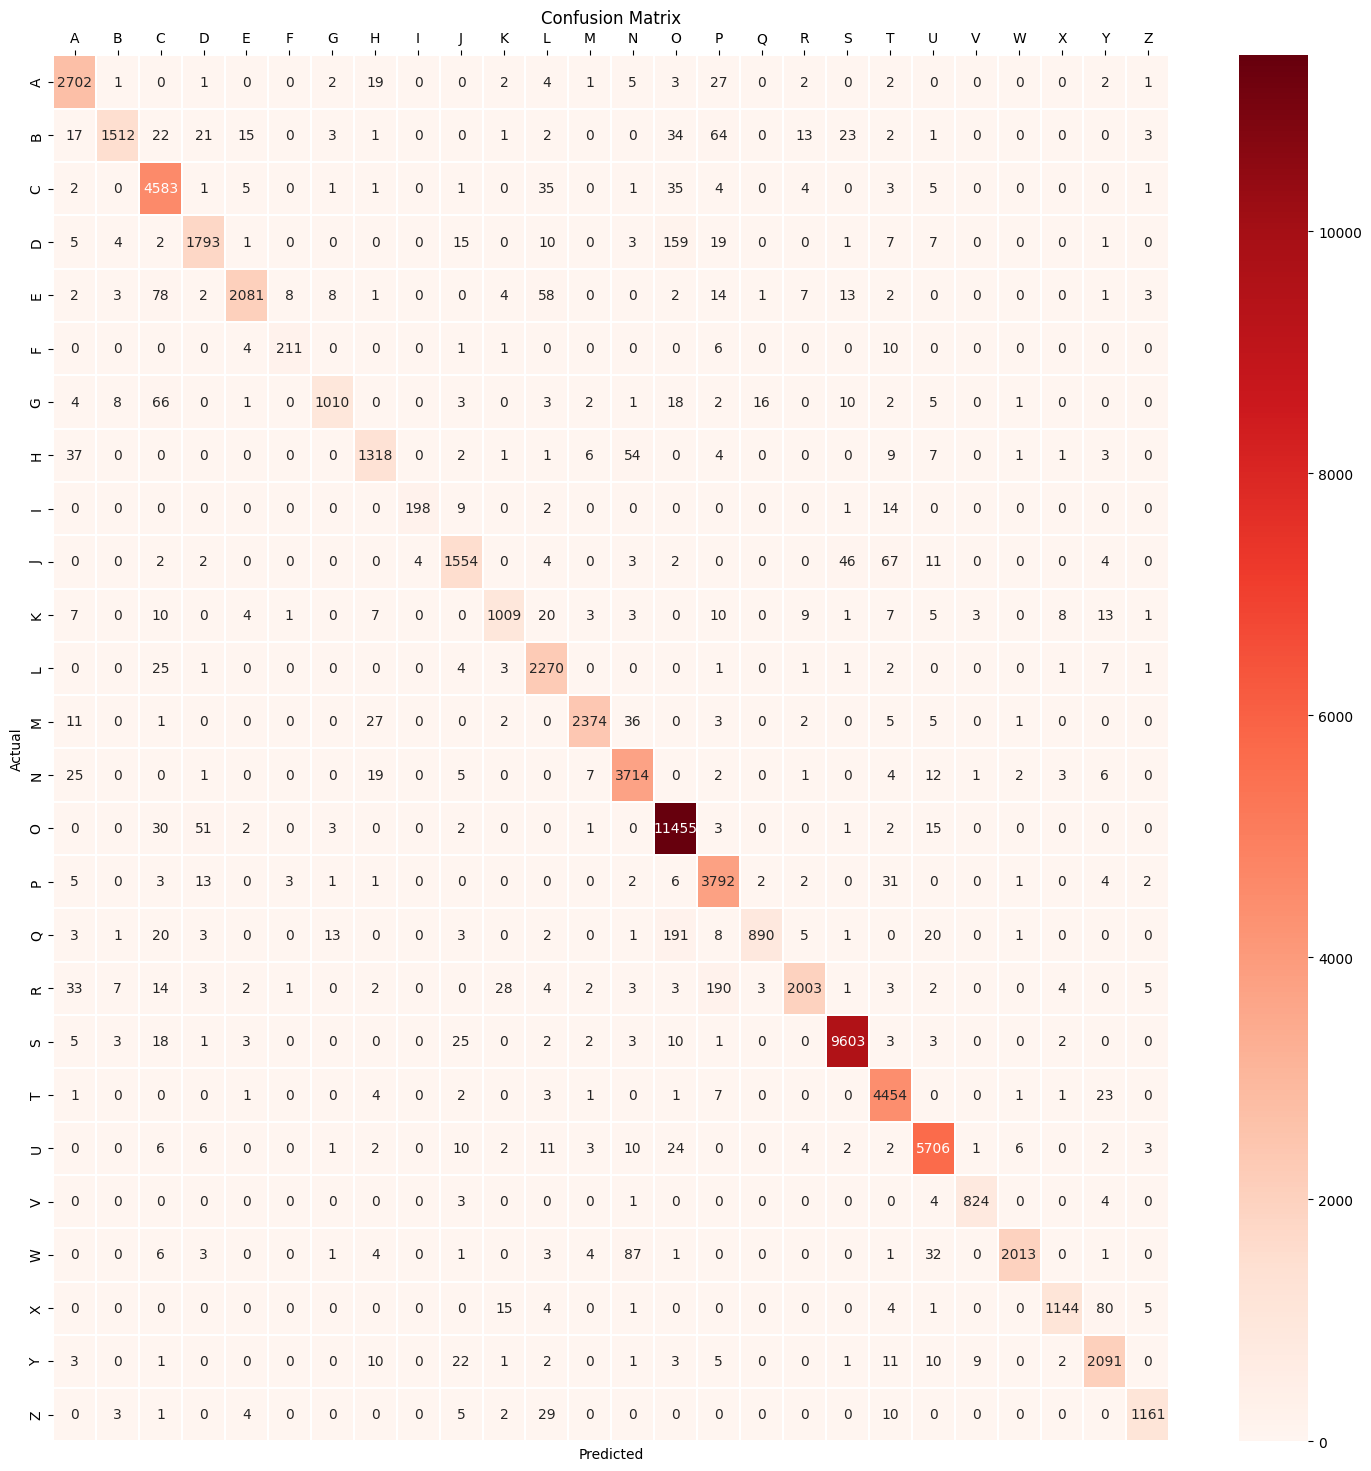

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import rcParams

alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

cm= confusion_matrix(y_true=y_test, y_pred=prediction)
s = sns.heatmap(cm, xticklabels=alphabets,yticklabels=alphabets, annot=True,fmt='g', cmap='Reds', linewidth=0.10)
s.set(title='Confusion Matrix')
s.xaxis.tick_top()
s.set_xlabel('Predicted')
s.set_ylabel('Actual')

rcParams['figure.figsize']=18,18